In [80]:
# importo librerias que voy a utilizar

import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
# cargo los datos con la libreria pandas
cars = pd.read_csv('carros.csv')
cars.head(3)

,Marca,Modelo,Año,Cilindraje cc,Caballos de Fuerza,Airbags,Peso KG,Velocidades,Tansmision,Capacidad de baul,Precio
0,Mazda,cx - 30,2022,2.0,186,7,1400,6,Automatica,295,91700000
1,Renault,Duster,2022,1.3,154,2,1255,6,Mecanica,400,82000000
2,Ford,EcoSport,2019,2.0,168,2,1280,6,Automatica,362,70490000


# Antes de crear un modelo de machine learning primero hago un analisis exploratorio de datos para ver como estan distribuidos

In [82]:
cars.describe() # para ver un resumen estadistico de como estan los datos

,Año,Cilindraje cc,Caballos de Fuerza,Airbags,Peso KG,Velocidades,Capacidad de baul,Precio
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,6.900000e+01
mean,2020.391304,1.798551,166.521739,5.333333,1474.550725,6.405797,501.449275,1.147048e+08
std,0.861213,0.588741,80.879651,1.844441,437.155967,1.275549,264.158739,7.463165e+07
min,2019.000000,1.000000,66.000000,2.000000,760.000000,5.000000,85.000000,3.549000e+07
25%,2020.000000,1.400000,111.000000,4.000000,1179.000000,6.000000,362.000000,6.499000e+07
50%,2021.000000,1.600000,145.000000,6.000000,1370.000000,6.000000,437.000000,8.799000e+07
75%,2021.000000,2.000000,186.000000,6.000000,1611.000000,7.000000,580.000000,1.410000e+08
max,2022.000000,3.600000,430.000000,9.000000,2755.000000,10.000000,1359.000000,3.900000e+08


In [83]:
# la desviacion estandar en las variables cilindraje, airbags y velocidades indica que no esta tan dispersos los datos
# asi que se pueden hacer histogramas, me gusta utilizar los histogramas por que me muestra como estan distribuidos los datos
# tambien por que me muestra que es lo que hay y lo que no hay

# con seaborn grafico los datos

/Users/giovanysamaca/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cilindraje cc', ylabel='count'>

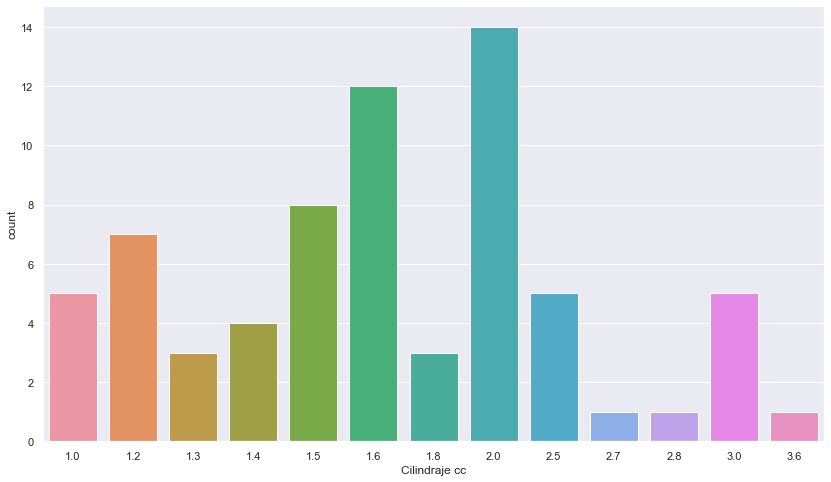

In [84]:
sns.set(rc={'figure.figsize':(14,8)})
sns.countplot(cars['Cilindraje cc'])

In [85]:
# hay variedad en el cilindraje de los carros, la mayoria de fabricantes optan por motores 1.6 y 2.0

/Users/giovanysamaca/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airbags', ylabel='count'>

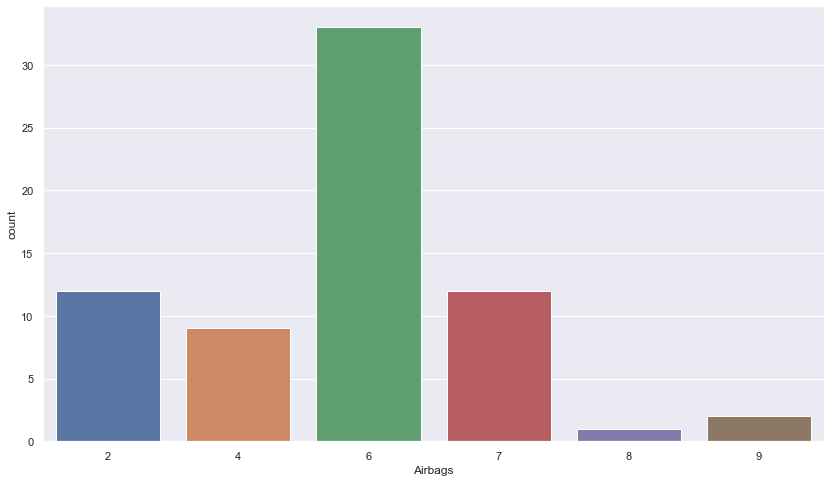

In [86]:
sns.set(rc={'figure.figsize':(14,8)})
sns.countplot(cars['Airbags'])

In [87]:
# en colombia no esta tan regulada la seguridad en los carros, pero es bueno que la mayoria de carros tengan 6 bolsas de aire

/Users/giovanysamaca/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Velocidades', ylabel='count'>

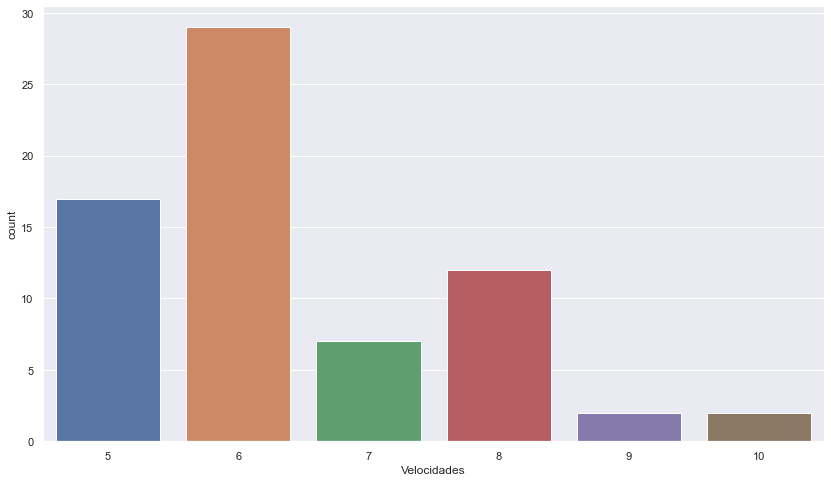

In [88]:
sns.set(rc={'figure.figsize':(14,8)})
sns.countplot(cars['Velocidades'])

In [89]:
# se puede ver que hay una minoria en los carros que tienen mas de 6 velocidades debe de ser por que en colombia son los mas exclusivos o costosos

In [90]:
# ahora voy a ver que tipo de datos hay
cars.dtypes 

Marca                  object
Modelo                 object
Año                     int64
Cilindraje cc         float64
Caballos de Fuerza      int64
Airbags                 int64
Peso KG                 int64
Velocidades             int64
Tansmision             object
Capacidad de baul       int64
Precio                  int64
dtype: object

In [103]:
# solo hay tres variables de tipo object y de resto son numericas ya que el dataset tiene 69 tipos de carros y modelos 
# voy a ver que datos hay en la variable Transmisión
cars['Tansmision'].unique()

array(['Automatica', 'Mecanica'], dtype=object)

In [104]:
cars.groupby(['Tansmision']).size().reset_index(name = 'counts')

,Tansmision,counts
0,Automatica,45
1,Mecanica,24


In [110]:
# ahora voy a trabajar con los datos de tipo numericos para saber que mas puedo encontar

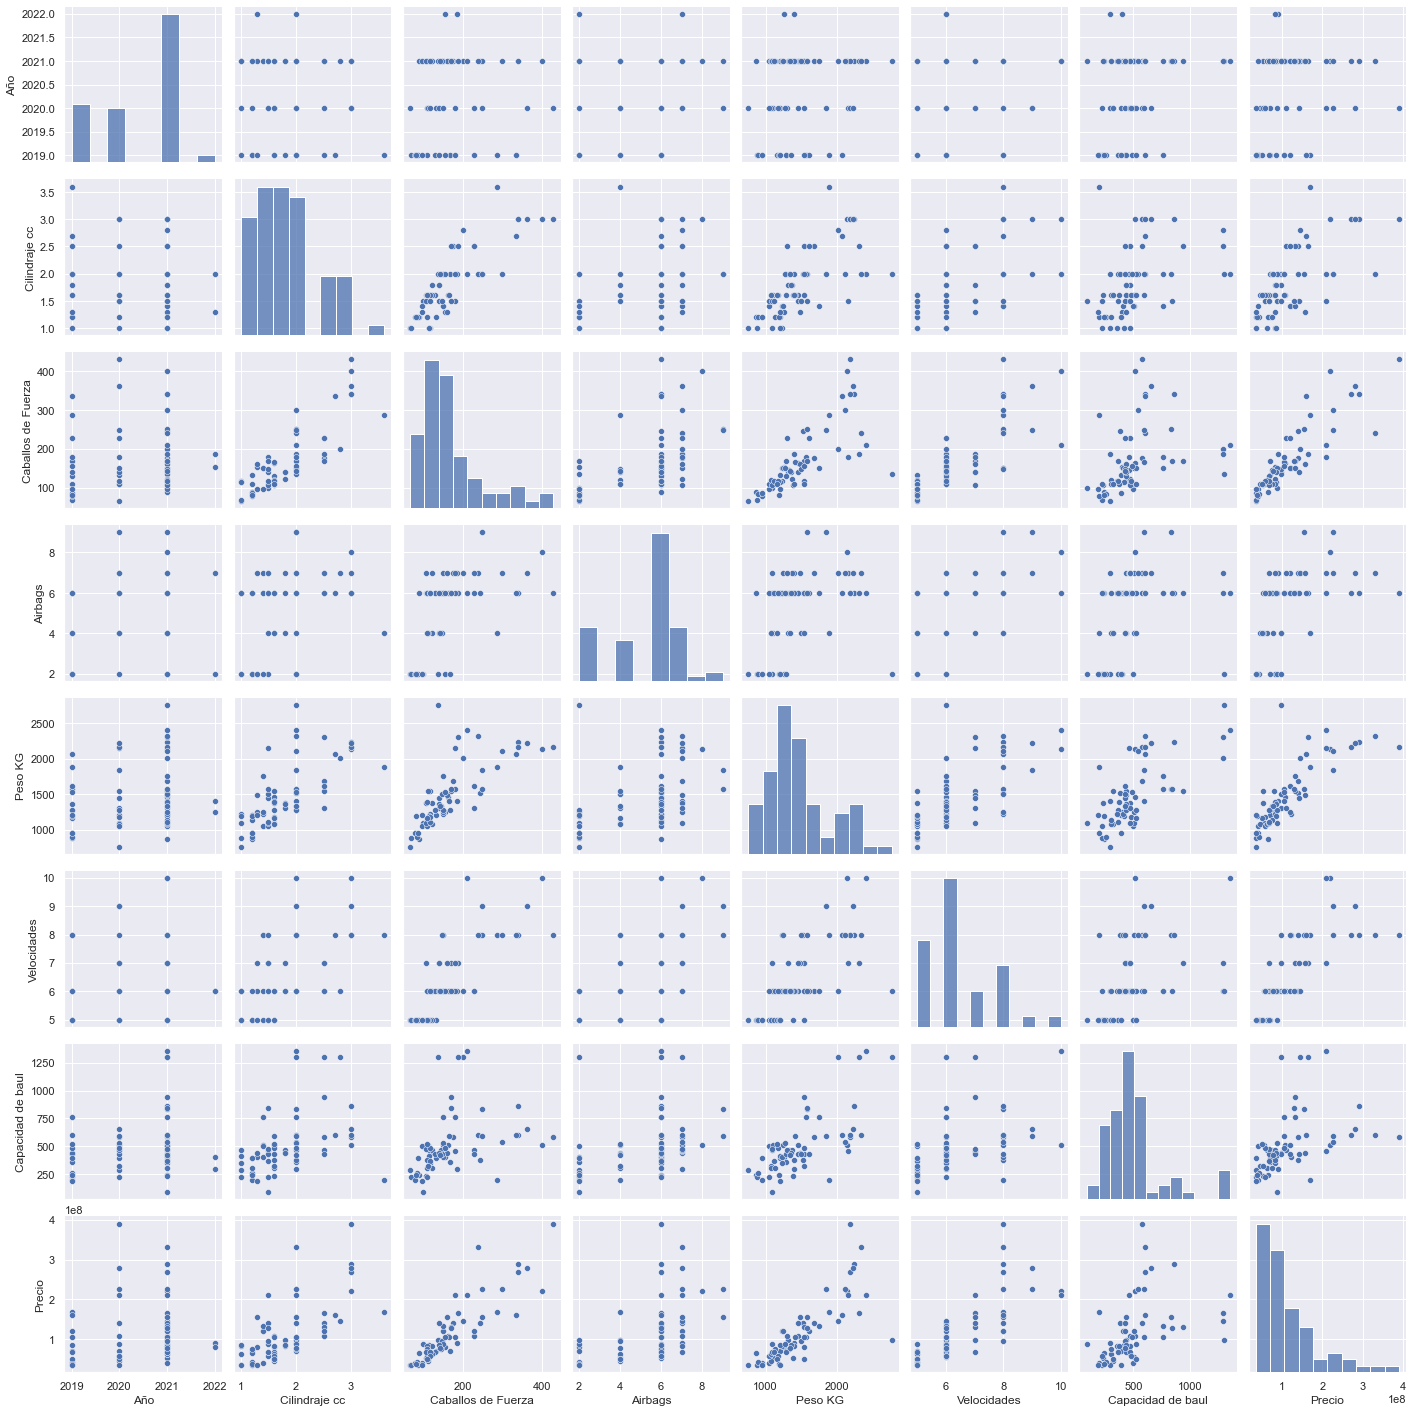

In [111]:
ax = sns.pairplot(cars)
ax
plt.show()

In [113]:
# se puede ver que hay muchas variables correlacionadas unas con mas intensidad que otras mediante los scatter plots 

In [114]:
# mediante una matriz de correlacion voy a averiguar cuanto miden las correlaciones

<function matplotlib.pyplot.show(close=None, block=None)>

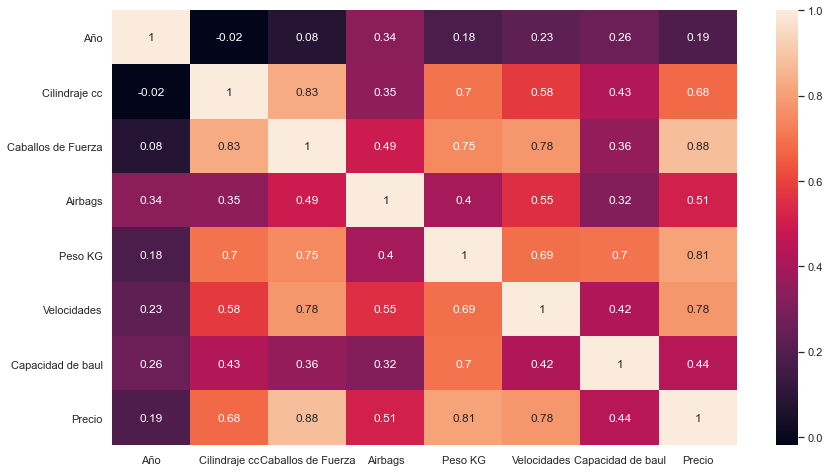

In [115]:
correlation_matrix = cars.corr().round(2)
sns.heatmap(data = correlation_matrix, annot = True)
plt.show

In [116]:
# las variables mas correlacionadas son caballos de fuerza, velocidades, peso kg, cilindraje y precio
# pero las correlaciones mas fuertes son con relacion al precio, esas son las que voy a graficar

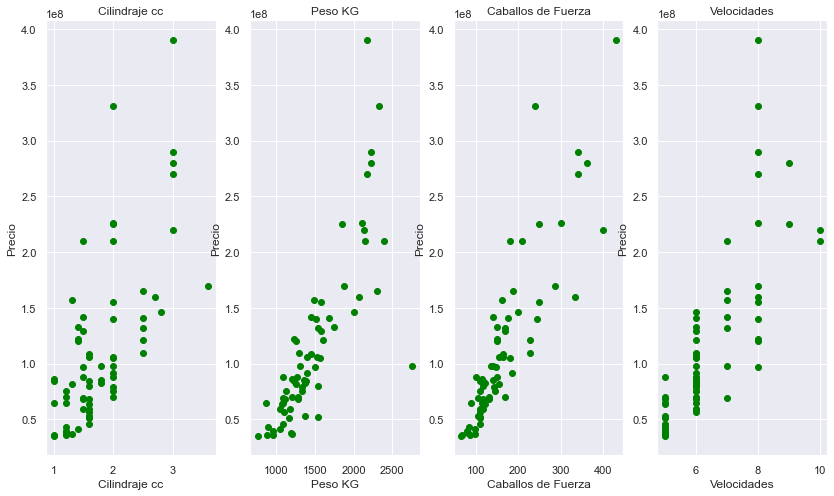

In [122]:
features = ['Cilindraje cc','Peso KG','Caballos de Fuerza','Velocidades']
target = cars['Precio']

for i, col in enumerate (features):
    plt.subplot(1, len(features), i+1)
    x = cars[col]
    y = target
    plt.scatter(x, y, marker = 'o',color='green')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Precio')
plt.show()

In [123]:
# voy a intentar predecir el Precio de un carro con estas cuatro variables (Cilindraje cc, Peso KG, Caballos de Fuerza, Velocidades)
# que son las que mas estan relacionadas con el Precio mediante una regresión lineal multiple

In [125]:
# del dataset tomo los valores con los que voy a entrenar el modelo
cilindraje = cars['Cilindraje cc'].values
peso = cars['Peso KG'].values
caballos_fuerza = cars['Caballos de Fuerza'].values
velocidades = cars['Velocidades'].values
precio = cars['Precio'].values

In [126]:
# declaro los valores de x y
x = np.array([cilindraje,peso,caballos_fuerza,velocidades]).T
y = np.array(precio)

In [128]:
# aqui entreno el modelo con los datos con la libreria sklearn
reg = LinearRegression()
reg = reg.fit(x,y)

In [129]:
# aqui declaro la variable a predecir que es y mediante los datos entrenados de x
# tambien declaro el error cuadratico para saber que tan exacto es el modelo
y_pred = reg.predict(x)
r2 = reg.score(x,y)

In [132]:
print('la exactitud del modelo es ',r2)

la exactitud del modelo es  0.8526341519956809


In [136]:
# aqui es donde ingreso los datos para que el modelo nos diga el valor de un carromediante las siguientes variables
cilindraje = 1.2
peso = 890
caballos_fuerza = 82
velocidades = 5
prediccion = reg.predict([[cilindraje,peso,caballos_fuerza,velocidades]])
print(f'el valor del carro es ${prediccion[0]:.0f}')
print('')
print(f'el algoritmo tiene un {r2*100:.0f}% de exactitud')

el valor del carro es $31609636

el algoritmo tiene un 85% de exactitud
